# **Senior Software Engineer Jobs in the Greater Philadelphia Area**

## Objective
Analyze the job postings to determine:

1. Desired skills and experience.
2. Payscale for Senior Developers in this area.
3. What company has the most postings.
4. Areas outside of the city with the most postings.
5. Variations in job title.

## Understanding the Column Data
* Title: job title
* Company: name of company
* Salary: if a salary is listed, it is provided here
* Description: the job description / details of position

## **Code**

### Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
csv = '/content/drive/My Drive/datasets/indeed/senior-software-engineer.csv'
df = pd.read_csv(csv)
df.head()

,Title,Company,Location,Salary,Description
0,Senior Full Stack JavaScript Software Engineer,ZenQMS,"Ardmore, PA 19003","$115,000 - $135,000 a year",ZenQMS’ product development team is looking fo...
1,Senior Software Engineer,Cox IT Global / Veteran's Engineering,"Philadelphia, PA 19107 (Washington Square area)","$90,000 - $120,000 a year",U.S. citizenship is required for working this ...
2,Sr. Python Software Engineer (Clean Tech job),UtilityAPI,United States,"$110,000 - $130,000 a year",This is the application for a Senior Python so...
3,Senior Software Engineer at Einstein Medical C...,Cerner,"Philadelphia, PA",None,Senior Software Engineer at Einstein Medical C...
4,Frontend Developer - Senior,CTI LLC,"Philadelphia, PA",$65 - $70 an hour,Role Description: Responsible for technical an...


## Job Titles

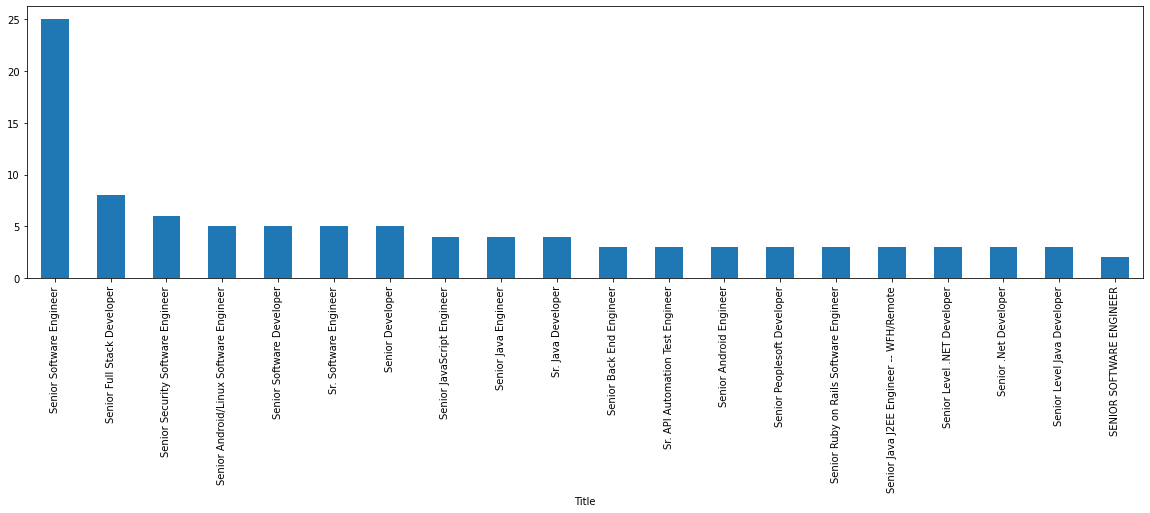

In [ ]:
top_jobs = df.groupby("Title").count()["Location"].sort_values(ascending=False)[:20]
top_jobs.plot(kind="bar", figsize=(20,5))

## Companies

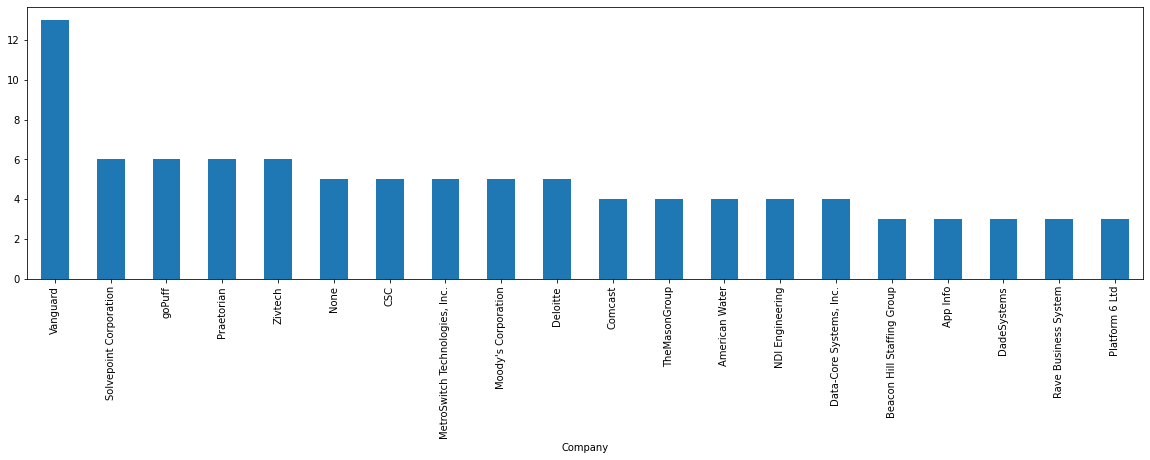

In [ ]:
top_companies = df.groupby("Company").count()["Title"].sort_values(ascending=False)[:20]
top_companies.plot(kind="bar", figsize=(20,5))

## Locations

In [ ]:
top_locations = df.groupby("Location").count()["Title"].sort_values(ascending=False)[:20]
top_locations

Location
Philadelphia, PA                                    47
United States                                       35
Philadelphia, PA 19103 (Logan Square area)          16
Malvern, PA                                         12
Philadelphia, PA 19107 (Washington Square area)     10
Wilmington, DE                                       9
Philadelphia, PA 19103 (Rittenhouse area)            9
West Chester, PA                                     7
Wayne, PA 19087                                      6
Philadelphia, PA 19123 (Northern Liberties area)     6
Conshohocken, PA 19428                               5
King of Prussia, PA                                  5
Wilmington, DE 19894                                 5
Philadelphia, PA 19112 (Navy Yard area)              5
Camden, NJ 08102 (Cooper Grant area)                 4
Philadelphia, PA 19104 (University City area)        4
Blue Bell, PA 19422                                  3
King of Prussia, PA 19406                            3
W

## Salary

In [ ]:
def format_salary(row):
    salary = row["Salary"]
    if "-" in salary:
        split = salary.split("-")
        salary_min = split[0]
        salary_max = split[1]
    else:
        salary_min = salary
        salary_max = salary
    
    row["salary_min"] = salary_min.replace("$","").replace("a month","").replace("a year","").replace(",","")
    row["salary_max"] = salary_max.replace("","").replace("a month","").replace("a year","").replace(",","")
       
    if "month" in row["Salary"]:
        row["salary_min"] = int(row["salary_min"])*12
        row["salary_max"] = int(row["salary_max"])*12
    
   
    return row


df_salary = df[df["Salary"]!= "None"].dropna()
df_salary = df_salary.apply(format_salary,axis=1) 

df_salary["salary_min"] = pd.to_numeric(df_salary["salary_min"],'coerce')
df_salary["salary_max"] = pd.to_numeric(df_salary["salary_max"],'coerce')

df_salary["salary_min"].mean()

92242.14666666667

In [ ]:
top_munnies = df.groupby("Salary").count()["Title"].sort_values(ascending=False)[:20]
top_munnies

Salary
None                          194
$130,000 - $180,000 a year      6
$100,000 - $130,000 a year      5
$104,062 a year                 4
$120,000 a year                 4
$65 - $75 an hour               3
$94,104 - $163,169 a year       3
$90,000 - $120,000 a year       2
$45 - $73 an hour               2
$140,000 - $160,000 a year      2
$80,000 - $110,000 a year       2
$109,000 - $139,000 a year      2
$150,000 - $185,000 a year      2
$100,000 - $150,000 a year      2
$135,000 - $175,000 a year      2
$125,000 a year                 2
$125,000 - $140,000 a year      2
$88,282 a year                  2
$50,000 - $60,000 a year        2
$120,000 - $160,000 a year      1
Name: Title, dtype: int64

## Desired Experience

In [ ]:
def cleanData(desc):
    desc = word_tokenize(desc)
    desc = [word.lower() for word in desc]
    desc = [word for word in desc if word not in stop_words]
    return desc

In [ ]:
stop_words = stopwords.words('english')
tags_df = df["Description"].apply(cleanData)
result = tags_df.apply(Counter).sum().items()
result = sorted(result, key=lambda kv: kv[1],reverse=True)
result_series = pd.Series({k: v for k, v in result})

### Cloud

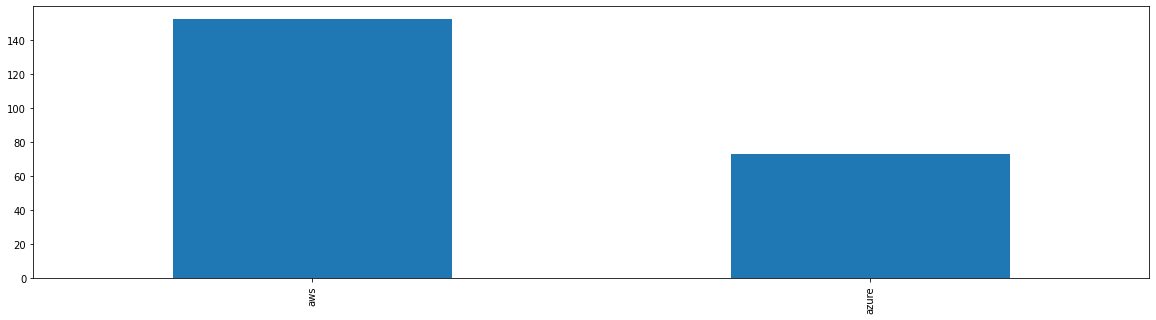

In [ ]:
skills = ["aws","azure"]
filter_series = result_series.filter(items=skills)
filter_series.plot(kind='bar',figsize=(20,5))

### Programming, Scripting, and Markup Languages

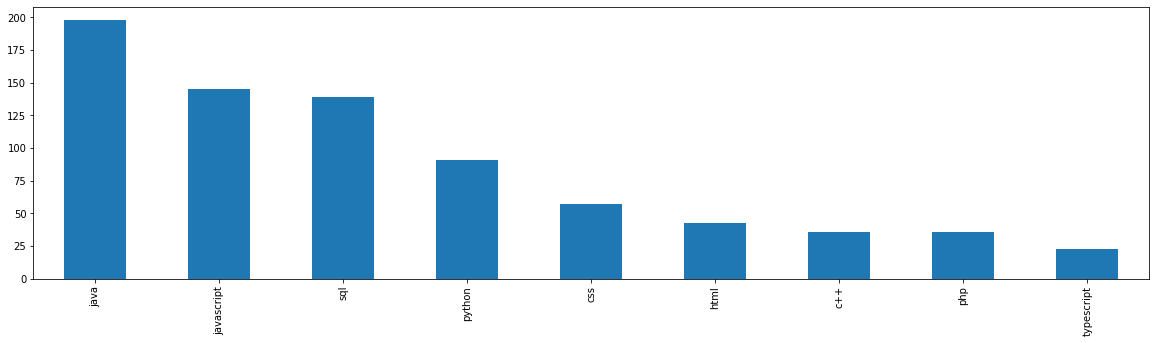

In [ ]:
skills = ["java", "javascript", "c#", "sql", "python", "css", "html", "c++", "php", "typescript"]
filter_series = result_series.filter(items=skills)
filter_series.plot(kind='bar',figsize=(20,5))

### Web Frameworks

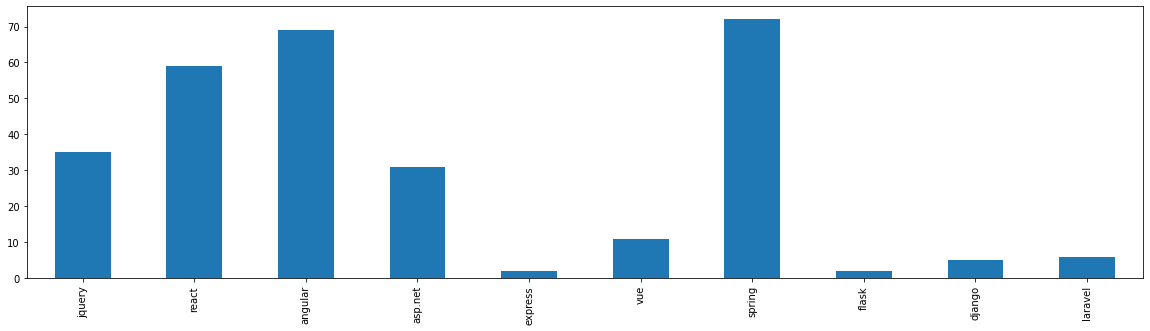

In [ ]:
skills = ["jquery", "react", "angular", "asp.net", "express", "vue", "spring", "flask", "django", "laravel"]
filter_series = result_series.filter(items=skills)
filter_series.plot(kind='bar',figsize=(20,5))

### Frameworks, Libraries, and Tools

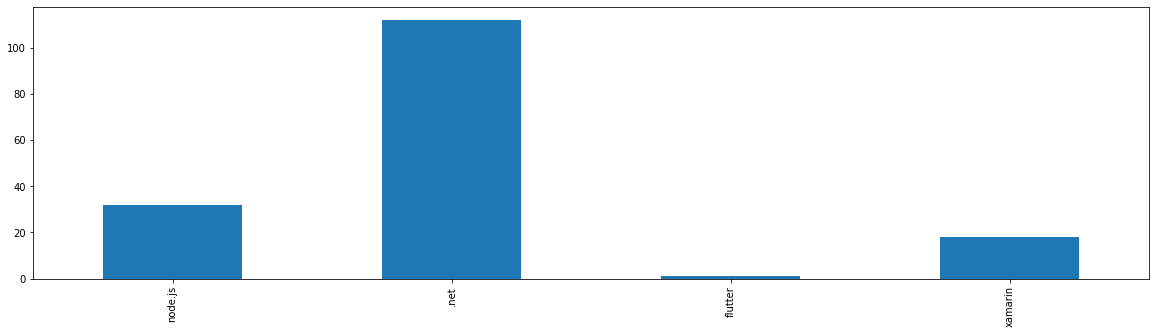

In [ ]:
skills = ["node.js", ".net", "flutter", "xamarin"]
filter_series = result_series.filter(items=skills)
filter_series.plot(kind='bar',figsize=(20,5))

### Databases

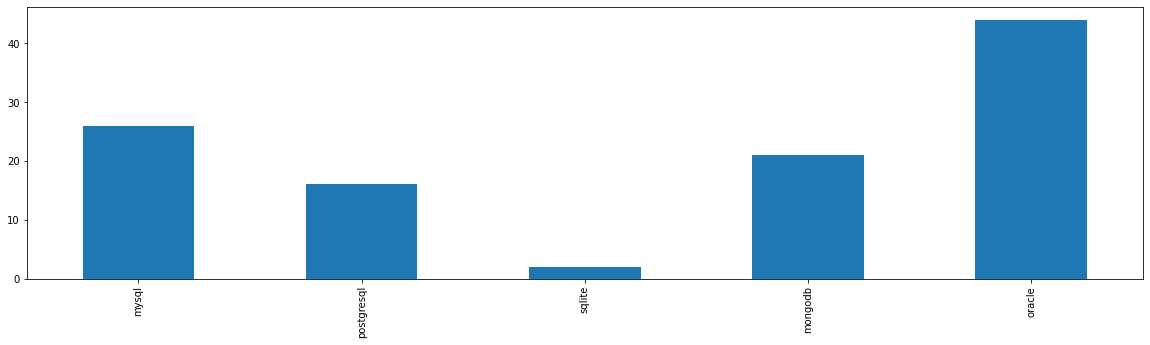

In [ ]:
skills = ["mysql", "postgresql", "sqlite", "mongodb", "oracle"]
filter_series = result_series.filter(items=skills)
filter_series.plot(kind='bar',figsize=(20,5))

### Platforms

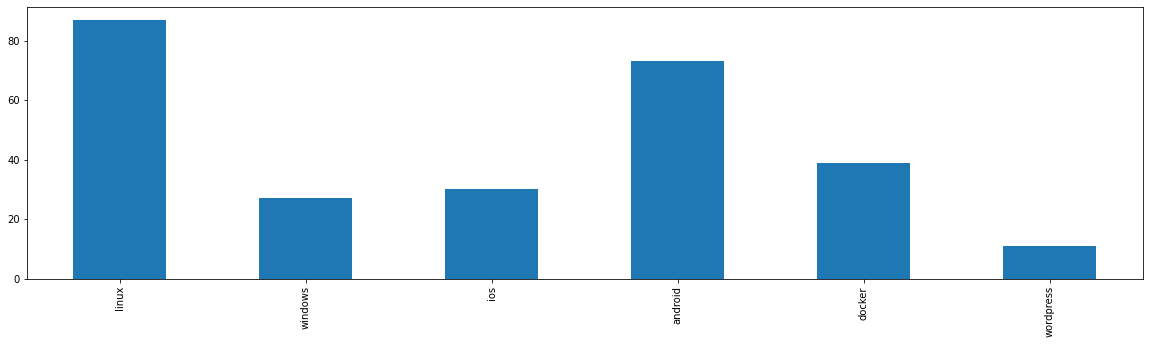

In [ ]:
skills = ["linux", "windows", "macos", "ios", "android", "docker", "wordpress"]
filter_series = result_series.filter(items=skills)
filter_series.plot(kind='bar',figsize=(20,5))

### Bash / Shell / PowerShell

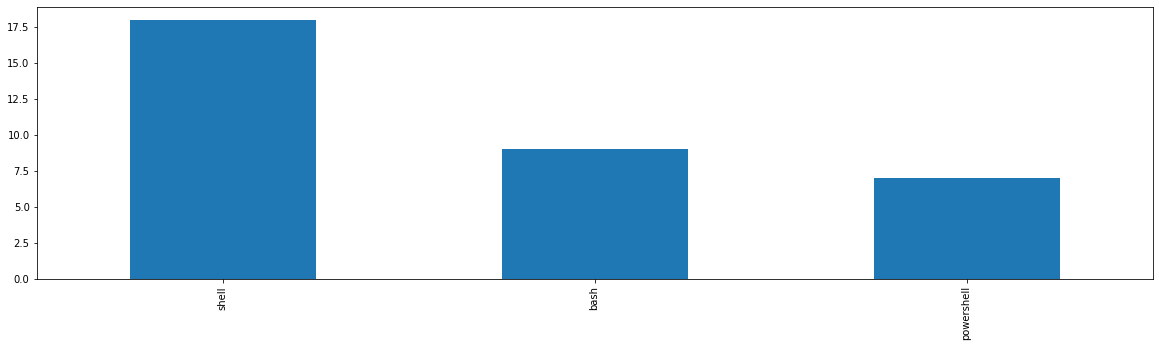

In [ ]:
skills = ["shell", "bash", "powershell"]
filter_series = result_series.filter(items=skills)
filter_series.plot(kind='bar',figsize=(20,5))

### Top Paying Languages (according to Stack Overflow)

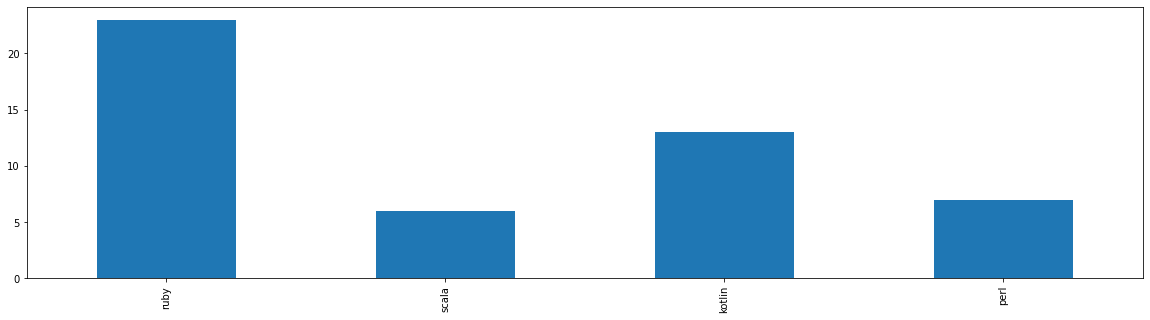

In [ ]:
skills = ["ruby", "scala", "kotlin", "perl"]
filter_series = result_series.filter(items=skills)
filter_series.plot(kind='bar',figsize=(20,5))

## **Summary**
* Top Experience: 
  * Programming: Java, [c#?]
  * Cloud: AWS
  * Web Frameworks: Angular & Spring
  * Other Frameworks:.NET
  * Database: Oracle
  * Platform: Linux
  * Scripting: Shell
  * Niche Language: Ruby

* Top Money Stats:
  * Average salary for a Senior Software Developer is $92,242.15 

  * The most common pay range is 130,000 - $180,000 a year

* Top Companies:
  * Vanguard has the most job openings
  * The top industries seem to be Finance, Software Consulting

* Top Locations:
  * Malvern, PA
  * West Chester, PA
  * Wayne, PA 

* Top Positions:
  * Senior Full Stack Developer
  * Senior Security Software Engineer
  * Senior Android/Linux Software Engineer

## **Conclusion**
Disregarding C# as it currently cannot be plotted, Software Engineers / Developers should focus on the Java and Spring stack. For frontend, Angular is currently more in demand than React. .NET has beat out Node.js. For cloud tech, focus on AWS over Azure. Linux and Shell scripting is in demand. As for higher paying niche languages, Ruby has the most openings, however, overall there are not many Ruby positions in the area.

Senior Software Engineers / Developers are somewhat well paid in the Greater Philadelphia Area. The average base pay is strangely on par with Glassdoor at $92,242.15. However most ranges provided are over 100,000 dollars per year, so obtaining that looks like it is within reach with the right experience and skillset.

The top company is Vanguard which is located in Malvern, PA which explains why Malvern is the number one location outside of Philadelphia. The top industries seem to be mainly Finance and Software Consulting. Having a financial background will benefit developers in this area.

As for locations, the city of Philadelphia has the most jobs. If a developer is planning on working outside of the city, they will want to target and/or probably move to Chester County or Montgomery County. Tredyffrin Township is also a nearby area.

The top detailed job titles are Senior Full Stack Developer, Senior Security Software Engineer, and Senior Android/Linux Software Engineer. A junior / mid-level developer will want to focus on Full Stack development to obtain senior roles.